In [1]:
import json
import os
import pandas as pd
import pickle # to create file with msg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS as sklear_stopwords
import re

In [4]:
PATH = os.getcwd()
dataset_path = os.path.join(PATH, "data/")

## Table of contents
<br>

1. [Mint NFT - first analysis](#MintNFT)      
    1.1. [Background](#Background)    
    1.2. [Skin](#Skin)    
    1.3. [Shell](#Shell)    
    1.4. [Body](#Body)    
    1.5. [Mouth](#Mouth)    
    1.6. [Eyes](#Eyes)    
    1.7. [Head](#Head)       
2. [Mint NFT - check data](#Analysis)
3. [Summary](#Summary)

In [5]:
counter = 135820
# unpickling file
with open(dataset_path+'messeges.pickle', 'rb') as handle:
    all_messages = [pickle.load(handle) for k in range(counter)] # 135820 to jest liczba wszystkich transakcji, które się nadawają == counter 
handle.close()

In [6]:
with open(dataset_path+"mint_nfts.pickle", "rb") as f:
    count = 10000
    mint_nfts = [pickle.load(f) for i in range(count)]
f.close()

In [7]:
exe = []
for mint in all_messages:
    if 'execute_order' in mint['exe_msg'] :
        exe.append(mint)

In [8]:
hash_id= []
token_id = []
currency = []
amount = []
timestamp = []
for e in exe:
    if 'nft' in e['exe_msg']['execute_order']['order']['order']['maker_asset']['info']:
        token_id.append(e['exe_msg']['execute_order']['order']['order']['maker_asset']['info']['nft']['token_id'])
        currency.append(e['exe_msg']['execute_order']['order']['order']['taker_asset']['info']['native_token']['denom'])
        amount.append(e['exe_msg']['execute_order']['order']['order']['taker_asset']['amount'])
    else:
        token_id. append(e['exe_msg']['execute_order']['order']['order']['taker_asset']['info']['nft']['token_id'])
        currency.append(e['exe_msg']['execute_order']['order']['order']['maker_asset']['info']['native_token']['denom'])
        amount.append(e['exe_msg']['execute_order']['order']['order']['maker_asset']['amount'])
    
    hash_id.append(e['hash_id'])
    timestamp.append(e['timestamp'])

In [9]:
df = pd.DataFrame(list(zip(token_id, hash_id, currency, amount, timestamp)),
            columns = ['token_id', 'hash_id','currency', 'amount', 'timestamp'])
df.to_pickle(dataset_path+'transactions.pkl')

In [10]:
columns = ['Name', 
           'Background', 
           'Skin', 
           'Shell', 
           'Body', 
           'Mouth', 
           'Eyes', 
           'Head', 
           'Token_ID']

In [11]:
mintNFT_df = pd.DataFrame(columns = columns)
mintNFT_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID


In [12]:
i = 0
for mint in mint_nfts:
    name = mint['exe_msg']['mint_nft']['extension']['name']
    token_id = mint['exe_msg']['mint_nft']['token_id']
    attributes = mint['exe_msg']['mint_nft']['extension']['attributes']
    attr_details = []
    for attr in attributes:
        attr_details.append(attr['value'])
    mintNFT_df.loc[i] = [name] + attr_details + [token_id]
    i+=1

In [13]:
mintNFT_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID
0,Terrapin #04880,Mint,Geisha,Knight Sword - Brown,Naked,Snarl - Cigar,Cyborg - Closed Eye,Spiky Hair - Brown,21115668659623778144848103954867683887
1,Terrapin #09271,Mint,Lion,Base Shell,Naked,Snarl,Tweeker Eyes,Mohawk - Black,339686573371205809325137876315247034028
2,Terrapin #00735,Blue Grey,Geisha,Diamond Back,Steam Punk Shirt - Red,Grin - 5pm Shadow,Monocle - Bored Eyes,None,26845686848091010612034591826243939022
3,Terrapin #08213,Lilac,Common,Base Shell,Leather Jacket - Black and White,Dopey,Eyepatch - Bored,Girls Hair - Brown,29725014212231427076011833295205785773
4,Terrapin #03821,Mint,Lion,Base Shell,Leather Jacket - Black and White,Grin - 5pm Shadow,Eyepatch - Angry,Pylon Helmet,208630217786676767860015082049195109707
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,Charcoal Full Moon,Tiger Teddy,Shell Spikes,Naked,Terrorpin,Steam Punk - Tweeker,Spiky Hair - Black,140850908578020633267983016681440335825
9996,Terrapin #00147,Early Light,Common,Base Shell,Hawaiian Shirt - Pineapple,Moustache,Cyborg - Bored,Lion Hat,198469524447758964403111579286542946696
9997,Terrapin #00148,Midnight Blue - Big Moon,Tiger Teddy,Angel Wings,Naked,Dopey,Angry Tweeker Eyes,Lion Hat,7349082768268168848355752264853030978
9998,Terrapin #00149,Mint,Tiger,Base Shell,Naked,Dopey,Eyepatch - Bored,Lion Hat,207748826621535591411786181607822466045


In [14]:
mintNFT_df['Shell'] = mintNFT_df['Shell'].str.replace(' Shell', '')
mintNFT_df['Eyes'] = mintNFT_df['Eyes'].str.replace(' Eyes', '')
mintNFT_df['Head'] = mintNFT_df['Head'].str.replace(' Hair', '')

In [15]:
mintNFT_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID
0,Terrapin #04880,Mint,Geisha,Knight Sword - Brown,Naked,Snarl - Cigar,Cyborg - Closed Eye,Spiky - Brown,21115668659623778144848103954867683887
1,Terrapin #09271,Mint,Lion,Base,Naked,Snarl,Tweeker,Mohawk - Black,339686573371205809325137876315247034028
2,Terrapin #00735,Blue Grey,Geisha,Diamond Back,Steam Punk Shirt - Red,Grin - 5pm Shadow,Monocle - Bored,None,26845686848091010612034591826243939022
3,Terrapin #08213,Lilac,Common,Base,Leather Jacket - Black and White,Dopey,Eyepatch - Bored,Girls - Brown,29725014212231427076011833295205785773
4,Terrapin #03821,Mint,Lion,Base,Leather Jacket - Black and White,Grin - 5pm Shadow,Eyepatch - Angry,Pylon Helmet,208630217786676767860015082049195109707
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,Charcoal Full Moon,Tiger Teddy,Shell Spikes,Naked,Terrorpin,Steam Punk - Tweeker,Spiky - Black,140850908578020633267983016681440335825
9996,Terrapin #00147,Early Light,Common,Base,Hawaiian Shirt - Pineapple,Moustache,Cyborg - Bored,Lion Hat,198469524447758964403111579286542946696
9997,Terrapin #00148,Midnight Blue - Big Moon,Tiger Teddy,Angel Wings,Naked,Dopey,Angry Tweeker,Lion Hat,7349082768268168848355752264853030978
9998,Terrapin #00149,Mint,Tiger,Base,Naked,Dopey,Eyepatch - Bored,Lion Hat,207748826621535591411786181607822466045


# MintNFT

In [16]:
# mintNFT_df.to_csv(dataset_path+'mints_data.csv', index=False)

In [17]:
dataset_path

'/home/iza/code/AoUD_v2/test/analysis-of-unstructured-data/data/'

In [18]:
mintNFT = pd.read_csv(dataset_path +'mints_data.csv')

In [19]:
mintNFT

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID
0,Terrapin #04880,Mint,Geisha,Knight Sword - Brown,Naked,Snarl - Cigar,Cyborg - Closed Eye,Spiky - Brown,21115668659623778144848103954867683887
1,Terrapin #09271,Mint,Lion,Base,Naked,Snarl,Tweeker,Mohawk - Black,339686573371205809325137876315247034028
2,Terrapin #00735,Blue Grey,Geisha,Diamond Back,Steam Punk Shirt - Red,Grin - 5pm Shadow,Monocle - Bored,None,26845686848091010612034591826243939022
3,Terrapin #08213,Lilac,Common,Base,Leather Jacket - Black and White,Dopey,Eyepatch - Bored,Girls - Brown,29725014212231427076011833295205785773
4,Terrapin #03821,Mint,Lion,Base,Leather Jacket - Black and White,Grin - 5pm Shadow,Eyepatch - Angry,Pylon Helmet,208630217786676767860015082049195109707
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,Charcoal Full Moon,Tiger Teddy,Shell Spikes,Naked,Terrorpin,Steam Punk - Tweeker,Spiky - Black,140850908578020633267983016681440335825
9996,Terrapin #00147,Early Light,Common,Base,Hawaiian Shirt - Pineapple,Moustache,Cyborg - Bored,Lion Hat,198469524447758964403111579286542946696
9997,Terrapin #00148,Midnight Blue - Big Moon,Tiger Teddy,Angel Wings,Naked,Dopey,Angry Tweeker,Lion Hat,7349082768268168848355752264853030978
9998,Terrapin #00149,Mint,Tiger,Base,Naked,Dopey,Eyepatch - Bored,Lion Hat,207748826621535591411786181607822466045


We need to create Data Frame - traits_rarity, which will contain alll information about how rare is trait.

In [20]:
TraitsRarity = pd.DataFrame()

In [21]:
mintNFT['Background'] = mintNFT['Background'].str.lower()
mintNFT['Skin'] = mintNFT['Skin'].str.lower()
mintNFT['Shell'] = mintNFT['Shell'].str.lower()
mintNFT['Body'] = mintNFT['Body'].str.lower()
mintNFT['Mouth'] = mintNFT['Mouth'].str.lower()
mintNFT['Eyes'] = mintNFT['Eyes'].str.lower()
mintNFT['Head'] = mintNFT['Head'].str.lower()

In [22]:
attributes = mintNFT
mintNFT

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID
0,Terrapin #04880,mint,geisha,knight sword - brown,naked,snarl - cigar,cyborg - closed eye,spiky - brown,21115668659623778144848103954867683887
1,Terrapin #09271,mint,lion,base,naked,snarl,tweeker,mohawk - black,339686573371205809325137876315247034028
2,Terrapin #00735,blue grey,geisha,diamond back,steam punk shirt - red,grin - 5pm shadow,monocle - bored,none,26845686848091010612034591826243939022
3,Terrapin #08213,lilac,common,base,leather jacket - black and white,dopey,eyepatch - bored,girls - brown,29725014212231427076011833295205785773
4,Terrapin #03821,mint,lion,base,leather jacket - black and white,grin - 5pm shadow,eyepatch - angry,pylon helmet,208630217786676767860015082049195109707
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,charcoal full moon,tiger teddy,shell spikes,naked,terrorpin,steam punk - tweeker,spiky - black,140850908578020633267983016681440335825
9996,Terrapin #00147,early light,common,base,hawaiian shirt - pineapple,moustache,cyborg - bored,lion hat,198469524447758964403111579286542946696
9997,Terrapin #00148,midnight blue - big moon,tiger teddy,angel wings,naked,dopey,angry tweeker,lion hat,7349082768268168848355752264853030978
9998,Terrapin #00149,mint,tiger,base,naked,dopey,eyepatch - bored,lion hat,207748826621535591411786181607822466045


## Background

In [23]:
background_set = dict(mintNFT['Background'].value_counts())

backgrounds = list(background_set.keys())
countBackground = list(background_set.values())

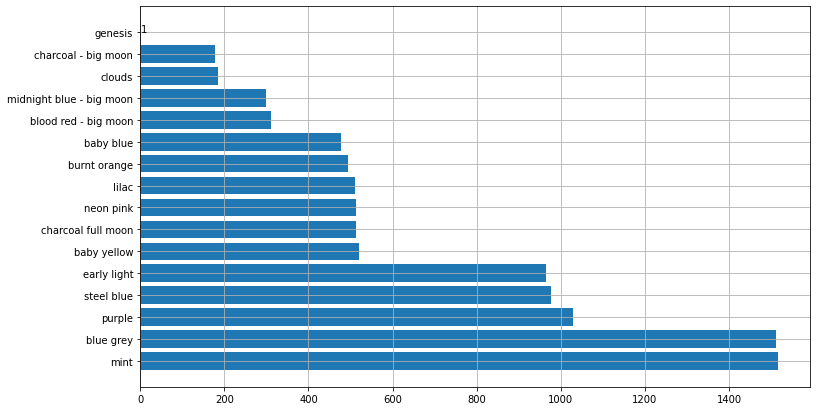

In [24]:
plt.figure(figsize=(12, 7))
plt.barh(backgrounds, countBackground)
plt.text(1, 15, str(1))
plt.grid()
# plt.annotate('1', (1, 15))

The most popular backgrounds are **Mint** and **Blue Grey**. The difference between these two and the color on the third place is significant - 483.
The interesting thing is that the difference between the first five colors and the rest is big. As we can see at the sixth place is twice times smaller than the first. 

Also we have unique value in our dataset. The background **Genesis** appears only once on 10 000 records what is reasonable because we have only one NFT picture which looks somehow like original form of the characters in this collection.

In [25]:
# background_set = dict(mintNFT['Background'].value_counts())

background_df = pd.DataFrame(columns=['Background', 'Count'])
background_df['Background'] = list(background_set.keys())
background_df['Count'] = list(background_set.values())

background_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
background_df['Count [%]'] = background_df['Count'].div(100)
background_df = background_df.drop(['Count'], axis=1)
TraitsRarity = pd.concat([TraitsRarity, background_df], axis=1)

In [26]:
background_df

,Background,Count [%]
0,mint,15.16
1,blue grey,15.11
2,purple,10.28
3,steel blue,9.76
4,early light,9.65
5,baby yellow,5.20
6,charcoal full moon,5.13
7,neon pink,5.13
8,lilac,5.11
9,burnt orange,4.95


The table above shows the percentages - this is better option to show how looks rarity for this characteristic. As we can notice the 
**Charcoal - Big Moon** is the rarest background (except Genesis). We can expect that this traits can make that the NFT value will be higher.

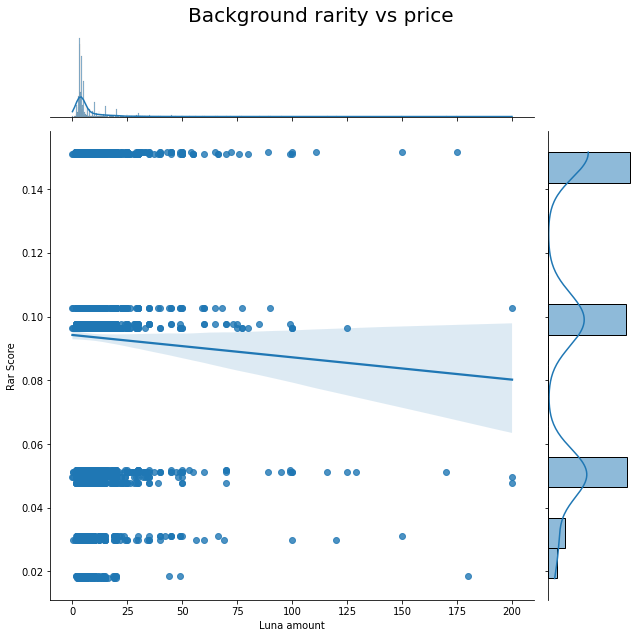

In [27]:
back =[]
for i in range(0, len(df)-1):
    index = attributes[attributes['Token_ID'] == df.loc[i,'token_id']].index.values
    back_rar = background_df[background_df['Background'] == attributes.loc[index[0], 'Background']].index
    back.append([df.loc[i, 'amount'], background_df.loc[back_rar[0], 'Count [%]']]) 

price_b = []
rar_b =[]
for i in back:
    price_b.append(int(i[0]))
    rar_b.append(float(i[1]))
ind = price_b.index(max(price_b))
price_b.remove(max(price_b))
rar_b.remove(rar_b[ind])
price_b = np.array(price_b)/1000000
rar_b = np.array(rar_b)/100

g = sns.jointplot(x=price_b, y=rar_b, kind='reg', height=9)
g.set_axis_labels('Luna amount', 'Rar Score', fontsize=10)
g.fig.suptitle("Background rarity vs price",fontsize=20)
g.fig.tight_layout()

For each attribute we have sketched charts showing the ratio of the price for which the token was sold to the rarity of a given element. This is to check if the rarity of the attribute could persuade the buyer to spend more currency.

In the case of the backgrounds, we can see that the regression line decreases significantly, which may suggest that tokens with a more unique background are valued more.

## Skin

In [28]:
skin_set = dict(mintNFT['Skin'].value_counts())

skins = list(skin_set.keys())
countSkin = list(skin_set.values())

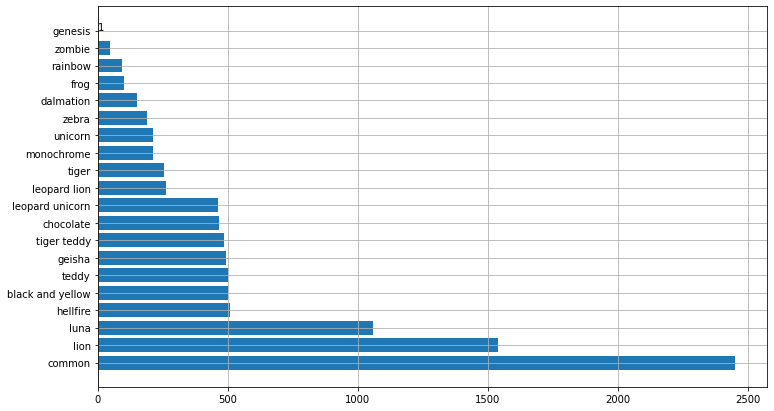

In [29]:
plt.figure(figsize=(12, 7))
plt.barh(skins, countSkin)
plt.text(1, 19, str(1))
plt.grid()
# plt.annotate('1', (1, 15))

In [30]:
skin_df = pd.DataFrame(columns=['Skin', 'Count'])
skin_df['Skin'] = list(skin_set.keys())
skin_df['Count'] = list(skin_set.values())

skin_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
skin_df['Count [%]'] = skin_df['Count'].div(100)
skin_df = skin_df.drop('Count', axis=1)
TraitsRarity = pd.concat([TraitsRarity, skin_df], axis=1)

In [31]:
skin_df

,Skin,Count [%]
0,common,24.52
1,lion,15.41
2,luna,10.59
3,hellfire,5.08
4,black and yellow,5.02
5,teddy,5.00
6,geisha,4.94
7,tiger teddy,4.85
8,chocolate,4.65
9,leopard unicorn,4.64


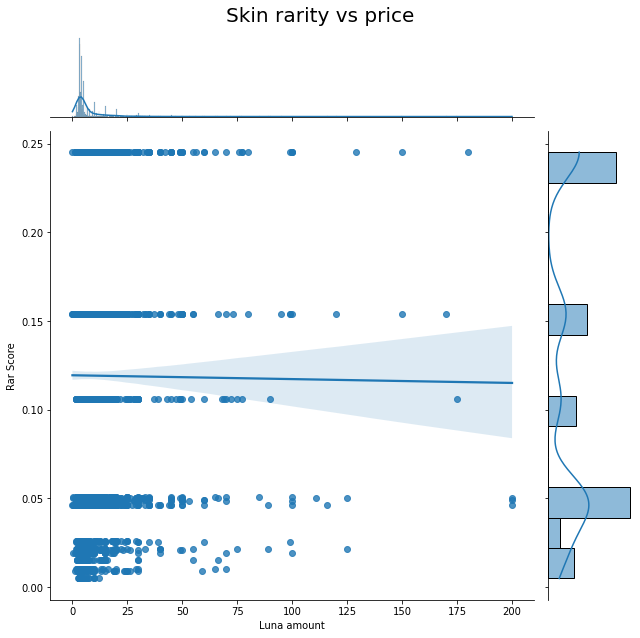

In [32]:
skin =[]
for i in range(0, len(df)-1):
    index = attributes[attributes['Token_ID'] == df.loc[i,'token_id']].index.values
    skin_rar = skin_df[skin_df['Skin'] == attributes.loc[index[0], 'Skin']].index
    skin.append([df.loc[i, 'amount'], skin_df.loc[skin_rar[0], 'Count [%]']]) 

price_s = []
rar_s =[]
for i in skin:
    price_s.append(int(i[0]))
    rar_s.append(float(i[1]))
ind = price_s.index(max(price_s))
price_s.remove(max(price_s))
rar_s.remove(rar_s[ind])
price_s = np.array(price_s)/1000000
rar_s = np.array(rar_s)/100

g = sns.jointplot(x=price_s, y=rar_s, kind='reg', height=9)
g.set_axis_labels('Luna amount', 'Rar Score', fontsize=10)
g.fig.suptitle("Skin rarity vs price",fontsize=20)
g.fig.tight_layout()

In the case of skin, we also see a slight decrease in regression, so we can make a similar assumption as in the case of the background

## Shell

In [33]:
shell_set = dict(mintNFT['Shell'].value_counts())

shells = list(shell_set.keys())
countShell = list(shell_set.values())

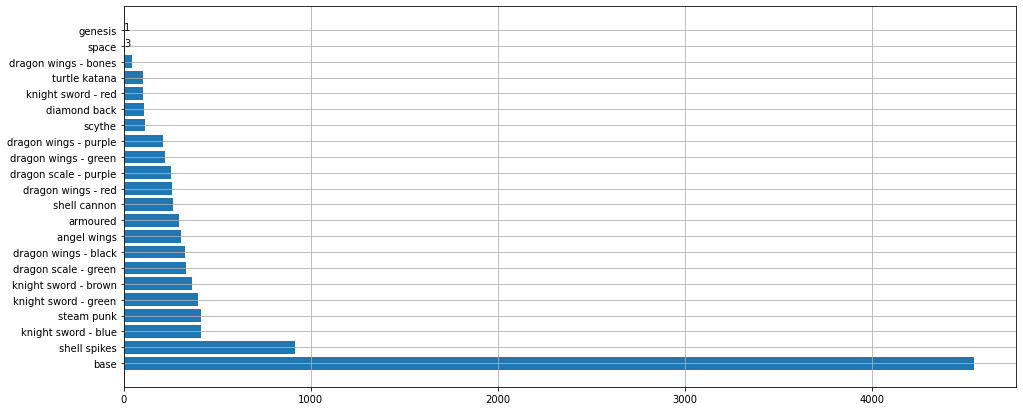

In [34]:
plt.figure(figsize=(16, 7))

plt.barh(shells, countShell)

for index, value in enumerate(countShell):
    if value <= 10:
        plt.text(value, index, str(value))
        
plt.grid()

In [35]:
shell_df = pd.DataFrame(columns=['Shell', 'Count'])
shell_df['Shell'] = list(shell_set.keys())
shell_df['Count'] = list(shell_set.values())

shell_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
shell_df['Count [%]'] = shell_df['Count'].div(100)
shell_df = shell_df.drop('Count', axis=1)
TraitsRarity = pd.concat([TraitsRarity, shell_df], axis=1)
shell_df

,Shell,Count [%]
0,base,45.47
1,shell spikes,9.15
2,knight sword - blue,4.14
3,steam punk,4.12
4,knight sword - green,3.96
5,knight sword - brown,3.67
6,dragon scale - green,3.34
7,dragon wings - black,3.28
8,angel wings,3.05
9,armoured,2.94


The table above shows the most popular shell looks in our dataset. As we can see between first and second place is significant difference. The most common shell is **Base Shell** - 45.47%. The rarest form is **Space Shell** - only 3 NFTs have this trait.

It is worth to mention that in this collection, if we have got NFT with *Base Shell*, we should interpret it as "undefined" trait. 

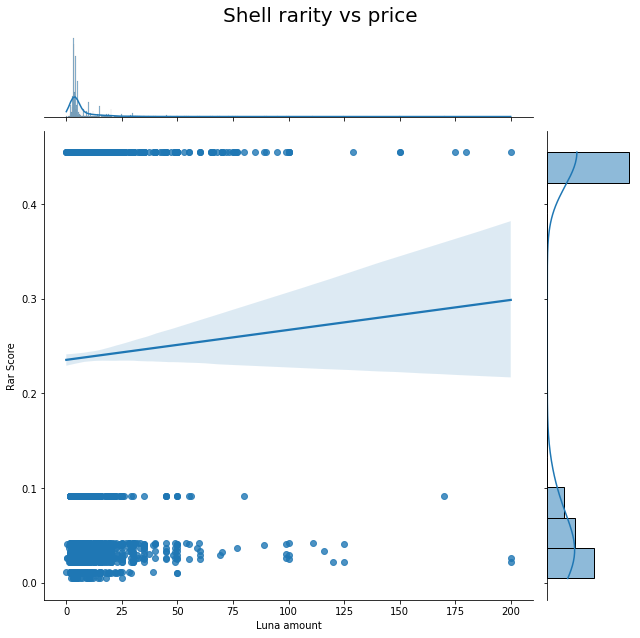

In [36]:
shell =[]
for i in range(0, len(df)-1):
    index = attributes[attributes['Token_ID'] == df.loc[i,'token_id']].index.values
    shell_rar = shell_df[shell_df['Shell'] == attributes.loc[index[0], 'Shell']].index
    shell.append([df.loc[i, 'amount'], shell_df.loc[shell_rar[0], 'Count [%]']]) 

price_sh = []
rar_sh =[]
for i in shell:
    price_sh.append(int(i[0]))
    rar_sh.append(float(i[1]))
ind = price_sh.index(max(price_sh))
price_sh.remove(max(price_sh))
rar_sh.remove(rar_sh[ind])
price_sh = np.array(price_sh)/1000000
rar_sh = np.array(rar_sh)/100

g = sns.jointplot(x=price_sh, y=rar_sh, kind='reg', height=9)
g.set_axis_labels('Luna amount', 'Rar Score', fontsize=10)
g.fig.suptitle("Shell rarity vs price",fontsize=20)
g.fig.tight_layout()

Similarly to the previous conclusions, we can assume that the shell is not an attribute that can bear the value of the token. Buyers do not give priority to this element. We can draw similar conclusions in the case of the eyes attribute.

## Body

In [37]:
body_set = dict(mintNFT['Body'].value_counts())

bodies = list(body_set.keys())
countBody = list(body_set.values())

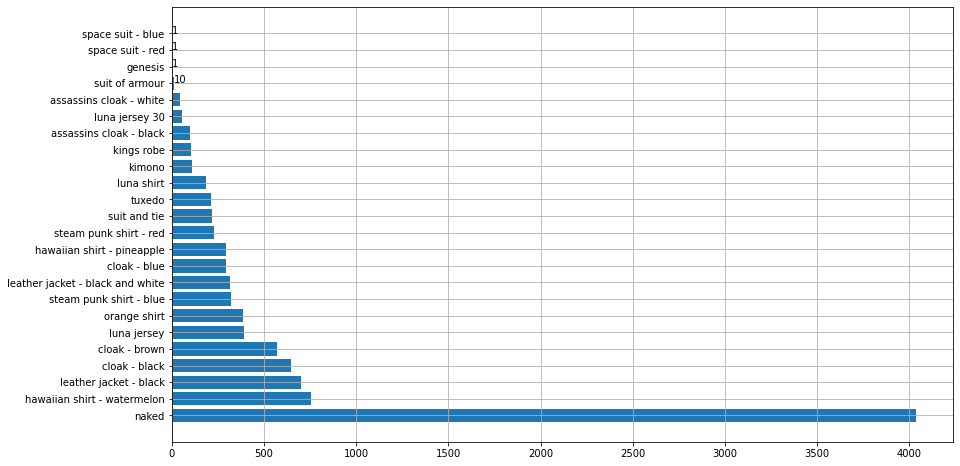

In [38]:
plt.figure(figsize=(14, 8))
plt.barh(bodies, countBody)
for index, value in enumerate(countBody):
    if value <= 10:
        plt.text(value, index, str(value))
        
plt.grid()

In [39]:
Body_df = pd.DataFrame(columns=['Body', 'Count'])
Body_df['Body'] = list(body_set.keys())
Body_df['Count'] = list(body_set.values())

Body_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
Body_df['Count [%]'] = Body_df['Count'].div(100)
Body_df = Body_df.drop('Count', axis=1)
TraitsRarity = pd.concat([TraitsRarity, Body_df], axis=1)

In [40]:
Body_df

,Body,Count [%]
0,naked,40.34
1,hawaiian shirt - watermelon,7.55
2,leather jacket - black,7.00
3,cloak - black,6.49
4,cloak - brown,5.72
5,luna jersey,3.92
6,orange shirt,3.85
7,steam punk shirt - blue,3.24
8,leather jacket - black and white,3.16
9,cloak - blue,2.97


For trait *Body* the rarity table looks as above. In this case the most popular form of trait have ~40% of all NFTs. As for previous one the difference between the first and the second place also is significant. 
If we would like to talk about the rarest form of trait we have got of course *Genesis* but also two unique characteristics **Space Suit - Red** and **Space Suit - Blue**. 

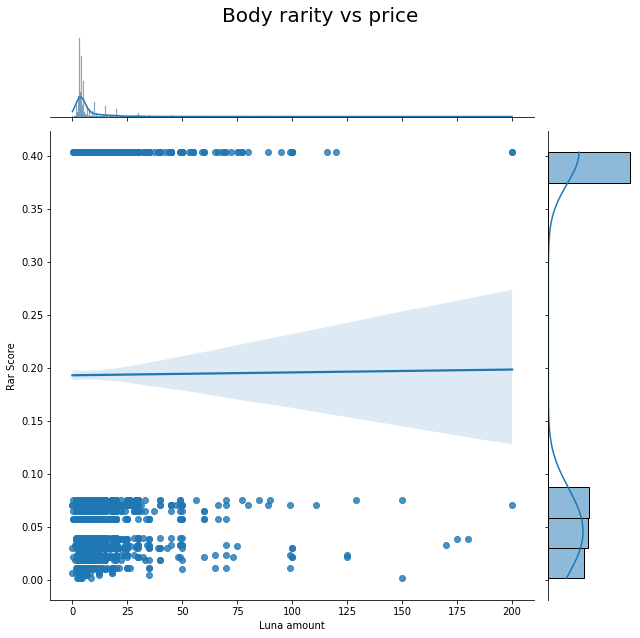

In [41]:
body =[]
for i in range(0, len(df)-1):
    index = attributes[attributes['Token_ID'] == df.loc[i,'token_id']].index.values
    body_rar = Body_df[Body_df['Body'] == attributes.loc[index[0], 'Body']].index
    body.append([df.loc[i, 'amount'], Body_df.loc[body_rar[0], 'Count [%]']]) 

price_bo = []
rar_bo =[]
for i in body:
    price_bo.append(int(i[0]))
    rar_bo.append(float(i[1]))
ind = price_bo.index(max(price_bo))
price_bo.remove(max(price_bo))
rar_bo.remove(rar_bo[ind])
price_bo = np.array(price_bo)/1000000
rar_bo = np.array(rar_bo)/100

g = sns.jointplot(x=price_bo, y=rar_bo, kind='reg', height=9)
g.set_axis_labels('Luna amount', 'Rar Score', fontsize=10)
g.fig.suptitle("Body rarity vs price",fontsize=20)
g.fig.tight_layout()

In the case of the body and the mouth, it is difficult to deduce anything specific because we do not see a tendency towards the any side.

## Mouth

In [42]:
mouth_set = dict(mintNFT['Mouth'].value_counts())

mouths = list(mouth_set.keys())
countMouth = list(mouth_set.values())

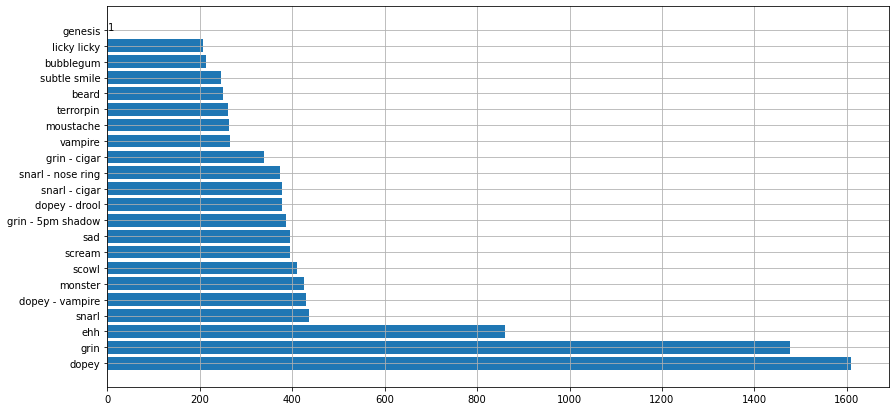

In [43]:
plt.figure(figsize=(14,7))
plt.barh(mouths, countMouth)

for index, value in enumerate(countMouth):
    if value <= 10:
        plt.text(value, index, str(value))
        
plt.grid()

In [44]:
Mouth_df = pd.DataFrame(columns=['Mouth', 'Count'])
Mouth_df['Mouth'] = list(mouth_set.keys())
Mouth_df['Count'] = list(mouth_set.values())

Mouth_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
Mouth_df['Count [%]'] = Mouth_df['Count'].div(100)
Mouth_df = Mouth_df.drop('Count', axis=1)
TraitsRarity = pd.concat([TraitsRarity, Mouth_df], axis=1)
Mouth_df

,Mouth,Count [%]
0,dopey,16.10
1,grin,14.78
2,ehh,8.61
3,snarl,4.37
4,dopey - vampire,4.29
5,monster,4.26
6,scowl,4.11
7,scream,3.95
8,sad,3.94
9,grin - 5pm shadow,3.87


Trait *Mouth* is not as diverse as the previous ones. Except *Genesis* we do not have any different characteristics which are unique at the similar level. Also as we can see there is no situation that between two first places is considerable difference that is way we will mention these two characteristics -  **Dopey** - 16.10% and **Grin** - 14.78%. The rarest trait again is *Genesis*, the second one is **Licky Licky** with result 2.07%.

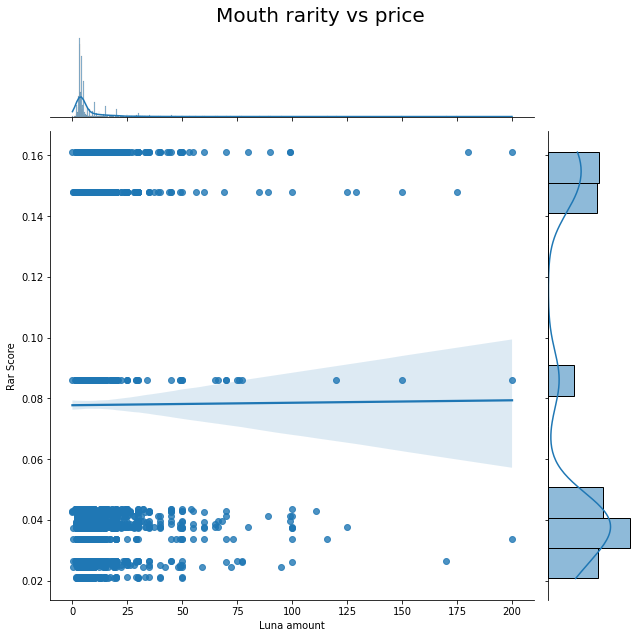

In [45]:
mouth =[]
for i in range(0, len(df)-1):
    index = attributes[attributes['Token_ID'] == df.loc[i,'token_id']].index.values
    mouth_rar = Mouth_df[Mouth_df['Mouth'] == attributes.loc[index[0], 'Mouth']].index
    mouth.append([df.loc[i, 'amount'], Mouth_df.loc[mouth_rar[0], 'Count [%]']]) 

price_m = []
rar_m =[]
for i in mouth:
    price_m.append(int(i[0]))
    rar_m.append(float(i[1]))
ind = price_m.index(max(price_m))
price_m.remove(max(price_m))
rar_m.remove(rar_m[ind])
price_m = np.array(price_m)/1000000
rar_m = np.array(rar_m)/100

g = sns.jointplot(x=price_m, y=rar_m, kind='reg', height=9)
g.set_axis_labels('Luna amount', 'Rar Score', fontsize=10)
g.fig.suptitle("Mouth rarity vs price",fontsize=20)
g.fig.tight_layout()

## Eyes 

In [46]:
eyes_set = dict(mintNFT['Eyes'].value_counts())

eyes = list(eyes_set.keys())
countEyes = list(eyes_set.values())

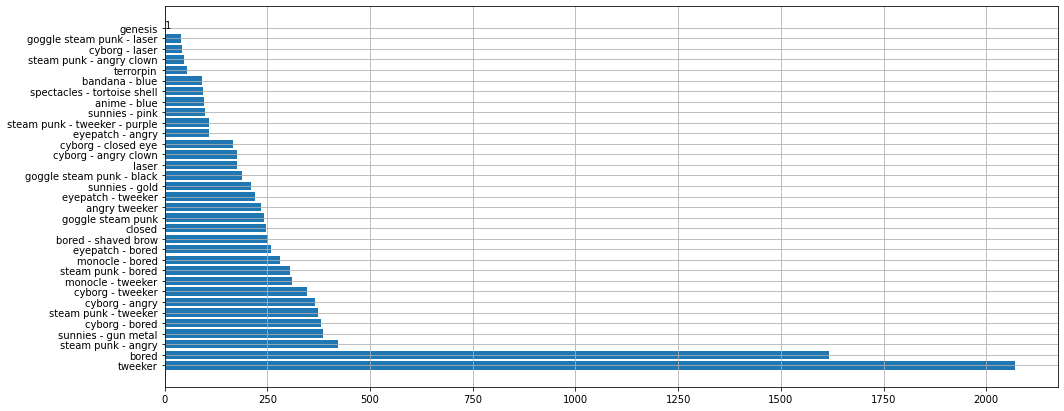

In [47]:
plt.figure(figsize=(16, 7))

plt.barh(eyes, countEyes)

for index, value in enumerate(countEyes):
    if value <= 10:
        plt.text(value, index, str(value))
plt.grid()

Trait *Eyes* has more options than previous ones. This causes that the first chart witch horizontal bars looks quite unreadible. Of course we are still able to defined which feature is the most common. But the table below presents these information much better. 

As we can also see this at the chart, the most popular feature for Eyes is **Tweeker Eyes** -  20.70%, a the second place is **Bored Eyes** - 16.17%. If we would like to received the rarity score for this feture wee need to avoid the most popular options. The interesting thing is that between second an third place is significant difference. Similar observation we were able to find for trait *Mouth*, but in this case the gap is bigger. 

The rarest three traits for *Eyes* are **Google Steam Punk** - 0.39%, **Cyborg - Laser** - 0.42% and **Steam Punk - Angry Clown** - 0.47%.

In [48]:
Eyes_df = pd.DataFrame(columns=['Eyes', 'Count'])
Eyes_df['Eyes'] = list(eyes_set.keys())
Eyes_df['Count'] = list(eyes_set.values())

Eyes_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
Eyes_df['Count [%]'] = Eyes_df['Count'].div(100)
Eyes_df = Eyes_df.drop('Count', axis=1)
TraitsRarity = pd.concat([TraitsRarity, Eyes_df], axis=1)
Eyes_df

,Eyes,Count [%]
0,tweeker,20.70
1,bored,16.17
2,steam punk - angry,4.21
3,sunnies - gun metal,3.85
4,cyborg - bored,3.80
5,steam punk - tweeker,3.72
6,cyborg - angry,3.65
7,cyborg - tweeker,3.46
8,monocle - tweeker,3.11
9,steam punk - bored,3.04


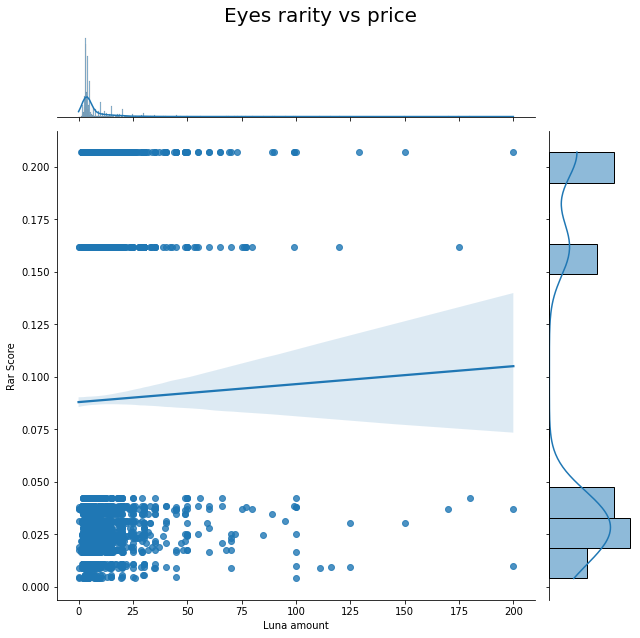

In [49]:
eyes =[]
for i in range(0, len(df)-1):
    index = attributes[attributes['Token_ID'] == df.loc[i,'token_id']].index.values
    eyes_rar = Eyes_df[Eyes_df['Eyes'] == attributes.loc[index[0], 'Eyes']].index
    eyes.append([df.loc[i, 'amount'], Eyes_df.loc[eyes_rar[0], 'Count [%]']]) 

price_e = []
rar_e =[]
for i in eyes:
    price_e.append(int(i[0]))
    rar_e.append(float(i[1]))
ind = price_e.index(max(price_e))
price_e.remove(max(price_e))
rar_e.remove(rar_e[ind])
price_e = np.array(price_e)/1000000
rar_e = np.array(rar_e)/100

g = sns.jointplot(x=price_e, y=rar_e, kind='reg', height=9)
g.set_axis_labels('Luna amount', 'Rar Score', fontsize=10)
g.fig.suptitle("Eyes rarity vs price",fontsize=20)
g.fig.tight_layout()

The rarity of the eyes also does not seem to be a priority for buyers.

## Head

In [50]:
head_set = dict(mintNFT['Head'].value_counts())

heads = list(head_set.keys())
countHead = list(head_set.values())

In [51]:
Head_df = pd.DataFrame(columns=['Head', 'Count'])
Head_df['Head'] = list(head_set.keys())
Head_df['Count'] = list(head_set.values())

Head_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
Head_df['Count [%]'] = Head_df['Count'].div(100)
Head_df = Head_df.drop('Count', axis=1)
TraitsRarity = pd.concat([TraitsRarity, Head_df], axis=1)
Head_df.head(20)

,Head,Count [%]
0,none,8.06
1,mohawk - black,4.25
2,spiky - brown,3.84
3,spiky - blonde,3.18
4,spiky - black,3.05
5,mohawk - silver,2.90
6,cap - anc,2.90
7,fried egg,2.72
8,mohawk - blue,2.70
9,cap - mir,2.54


In [52]:
Head_df.tail(10)

,Head,Count [%]
53,assassins cowl - white,0.27
54,pylon helmet,0.18
55,plague mask,0.15
56,dagon hat - purple - laser,0.12
57,dragon skull,0.06
58,astronaut helmet - clear,0.03
59,bunny ears - brown,0.03
60,astronaut helmet - black,0.02
61,bunny ears - white,0.02
62,genesis,0.01


The data diversification for column *Head* is more significant than if we were talking about previous ones. It is caused by that we have also different colors of hair, some hair accessories and headwear - like hat or helmets. That is way we divided this column two two subsets where we will be able to check the most popular haircut, headwear or accessories and in the second one we wiil be able to check which color is the most common. 


In [53]:
# creating subsets
Colors = []
Forms = []
for head in heads:
    
    words = head.split(' - ')
    countWords = len(words)
    
    if (len(head.split(' ')) == 1 and countWords == 1):
        if not words[0] in Forms:
            Forms.append(words[0])
        
    elif countWords == 1:
        if not words[0] in Forms:
            Forms.append(words[0])
        
    elif countWords == 2:
        form, color = words
        if not color in Colors:
            Colors.append(color)
        if not form in Forms:
            Forms.append(form)
        
    else:
        form, color, add = words
        
        if not color in Colors:
            Colors.append(color)
        temp = form+' '+add
        if not temp in Forms:
            Forms.append(temp)
#         Forms.append(form+' '+add)

In [54]:
headColors = {}
headForms = {}
for head in head_set:
    for color in Colors:
        if color in head:
            if color in headColors.keys():
                headColors[color] += head_set[head]
            else:
                headColors[color] = head_set[head]
    
    for form in Forms:
        if form in head:
            if form in headForms.keys():
                headForms[form] += head_set[head]
            else:
                headForms[form] = head_set[head]

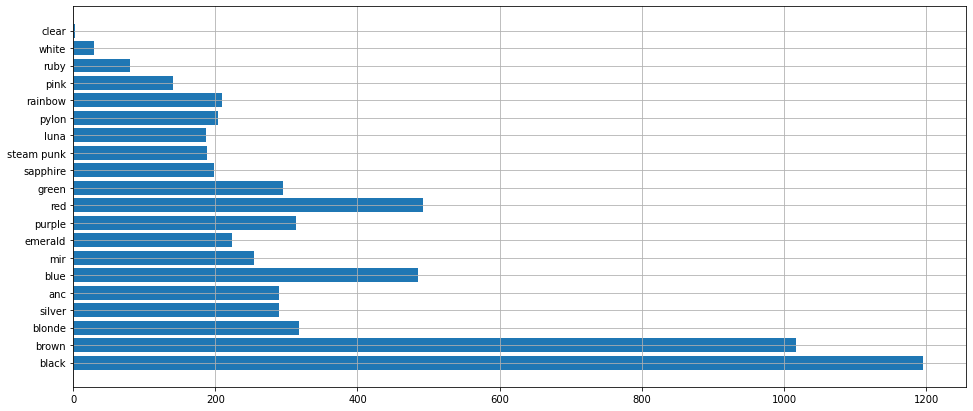

In [55]:
x_axis = list(headColors.keys())
y_axis = list(headColors.values())


plt.figure(figsize=(16, 7))
plt.barh(x_axis, y_axis)
plt.grid()

In [56]:
headColors_df = pd.DataFrame(columns=['color', 'Count'])
headColors_df['color'] = x_axis
headColors_df['Count'] = y_axis

In [57]:
headColors_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
headColors_df['Count [%]'] = headColors_df['Count'].div(100)
headColors_df = headColors_df.drop('Count', axis=1)
headColors_df.sort_values(by=['Count [%]'], ascending=False).reset_index(drop=True)
headColors_df

,color,Count [%]
0,black,11.96
1,brown,10.17
2,blonde,3.18
3,silver,2.90
4,anc,2.90
5,blue,4.85
6,mir,2.54
7,emerald,2.23
8,purple,3.13
9,red,4.92




Above we received the results of looking for popularity of the color in data set. as wee can see the most common color of items for trait *Head* is **black**, the next one is brown. 
It is good to mention that values which define gems are only defined for *Crown*. So if we would like to see the gem is the most common or rarest we need to create comparison which based only for *Crown* feature. But above table in general is good to be a source of informations. 

In [58]:
x_axisF = list(headForms.keys())
y_axisF = list(headForms.values())

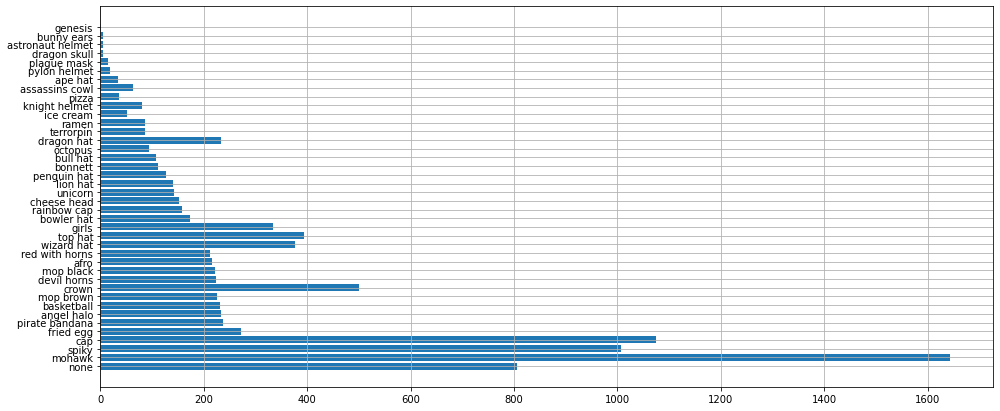

In [59]:
plt.figure(figsize=(16, 7))
plt.barh(x_axisF, y_axisF)
plt.grid()

In [60]:
headForms_df = pd.DataFrame(columns=['Form', 'Count'])
headForms_df['Form'] = x_axisF
headForms_df['Count'] = y_axisF

In [61]:
headForms_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
headForms_df['Count [%]'] = headForms_df['Count'].div(100)
headForms_df = headForms_df.drop('Count', axis=1)
headForms_df

,Form,Count [%]
0,none,8.06
1,mohawk,16.44
2,spiky,10.07
3,cap,10.75
4,fried egg,2.72
5,pirate bandana,2.37
6,angel halo,2.33
7,basketball,2.32
8,mop brown,2.26
9,crown,5.01


Lets analyze table *headForms_df* which contains result of popularituy of different options of head. The most popular is **Mohawk** - 16.44% and the second place belongs to **Cap**. This results are very interesting because at the beggining of cheking thi strait we received that the most common form for *Head* is option **None**. After excluding color of headwear we can see that the first place actually belongs to previous mentioned - *Mohawk*. If we do not divide this features to two subsets we would be wrong. 


Similar observation we are able to get analysing the rarest items. In the first general table three places of the rarest items are as follows: 
1. **Bunny Ears - white** (0.02%) and  **Astronaut Helmet - black** (0.02%)
2. **Asrtronaut Helmet - clear** (0.03%) and **Bunny Ears - brown** (0.03%). 
3. **Dragon Skull** (0.06%)

In table *headForms_df*:
1. **Astronaut Helmet** and **Bunny Ears** (0.05%)
2. **Dragon Skull** (0.06%)
3. **Plague Mask** (0.15%)

For the ranking of the rarest items teh results are almost the same.

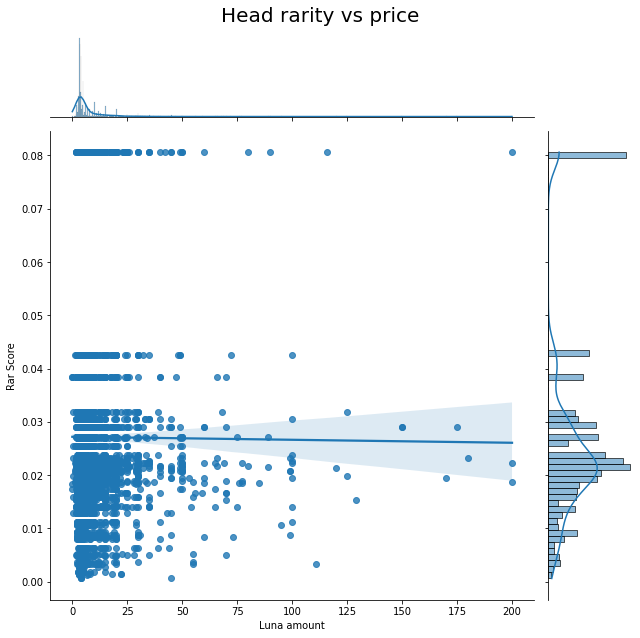

In [62]:
head =[]
for i in range(0, len(df)-1):
    index = attributes[attributes['Token_ID'] == df.loc[i,'token_id']].index.values
    head_rar = Head_df[Head_df['Head'] == attributes.loc[index[0], 'Head']].index
    head.append([df.loc[i, 'amount'], Head_df.loc[head_rar[0], 'Count [%]']]) 

price_h = []
rar_h =[]
for i in head:
    price_h.append(int(i[0]))
    rar_h.append(float(i[1]))
ind = price_h.index(max(price_h))
price_h.remove(max(price_h))
rar_h.remove(rar_h[ind])
price_h = np.array(price_h)/1000000
rar_h = np.array(rar_h)/100

g = sns.jointplot(x=price_h, y=rar_h, kind='reg', height=9)
g.set_axis_labels('Luna amount', 'Rar Score', fontsize=10)
g.fig.suptitle("Head rarity vs price",fontsize=20)
g.fig.tight_layout()

According to our analyzes, the head as the most diverse attribute may slightly affect the price

In [63]:
TraitsRarity.to_csv(dataset_path+'traits_rarity.csv')

# Analysis

Let's define situation when some of the traits are not specified. In our dataset we are not able to use "None" because all of the attributes are kinda defined. But after reseraching we can say that traits are not specified if:
- Shell is a **Base Shell**
- Head is **None**
- Body is **Naked**
- Skin is **Common**

For $Eyes$, $Mouth$ and $Background$ we are not able to unambiguously decide which one of decribptions are neutral and are "undefined". That's why in our analysis we will be using only those four attributes.

In [64]:
attributes = mintNFT

In [65]:
basicTraits = ["base", "none", "naked","common"]
definedAttributesPerRow = []

In [66]:
attributes_temp = mintNFT[[
           'Background', 
           'Skin', 
           'Shell', 
           'Body', 
           'Mouth', 
           'Eyes', 
           'Head']].values.tolist()

In [67]:
basicSkin = 0
basicBody = 0
basicShell = 0
basicHead = 0

for attr_i in attributes_temp:
    definedRows = 3
    for basic in basicTraits:
        if basic not in attr_i:
            definedRows+=1
        elif basic == basicTraits[0]:
            basicShell +=1
        elif basic == basicTraits[1]:
            basicHead +=1
        elif basic == basicTraits[2]:
            basicBody += 1
        else:
            basicSkin +=1
    definedAttributesPerRow.append(definedRows)

In [68]:
attributes['Defined_Rows'] = definedAttributesPerRow

In [69]:
definedRows_set = dict(attributes['Defined_Rows'].value_counts())
values = list(definedRows_set.values())
labels = list(definedRows_set.keys())
labels = ['6 attributes', '5 attributes', '7 attributes', '4 attributes', '3 attributes']
# definedRows_set

([<matplotlib.patches.Wedge at 0x7f72ad97a6d0>,
 [Text(0.22374277442564774, 1.077004721852376, '6 attributes'),
  Text(-0.9855389058445421, -0.4885827105687869, '5 attributes'),
  Text(0.4929125785704812, -0.9833804909021734, '7 attributes'),
  Text(1.0752142417846344, -0.2321946042945317, '4 attributes'),
  Text(1.0999174363096664, -0.01347713997743173, '3 attributes')],
 [Text(0.12204151332308058, 0.5874571210103868, '43.48%'),
  Text(-0.5375666759152047, -0.26649966031024735, '27.69%'),
  Text(0.26886140649298973, -0.5363893586739127, '22.45%'),
  Text(0.5864804955188914, -0.12665160234247183, '5.99%'),
  Text(0.599954965259818, -0.007351167260417306, '0.39%')])

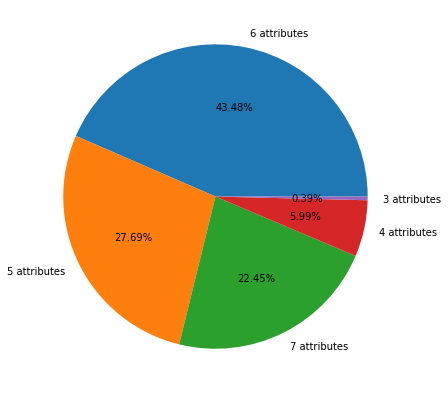

In [70]:
plt.figure(figsize=(12,7))
plt.pie(values, autopct='%0.2f%%', labels = labels)

As we can see the the majority of Nft's has not defined a least one trait. Only 0.39% of all NFT's have defined only 3 attributes. This observation is really interesting because we can have a proof that the varity of our dataset isn't small.

([<matplotlib.patches.Wedge at 0x7f72adb96e80>,
 [Text(-0.6662844481345152, 0.8752514119806291, 'missing Skin'),
  Text(-0.76559734557703, -0.7898485325968556, 'missing Body'),
  Text(1.0977792607108126, -0.06986196929104051, 'missing Shell'),
  Text(0.23347829312642657, 1.0749362244518372, 'missing Head')],
 [Text(-0.3634278808006446, 0.47740986108034306, '20.71%'),
  Text(-0.4175985521329254, -0.43082647232555754, '34.07%'),
  Text(0.5987886876604431, -0.038106528704203904, '38.41%'),
  Text(0.1273517962507781, 0.5863288497010021, '6.81%')])

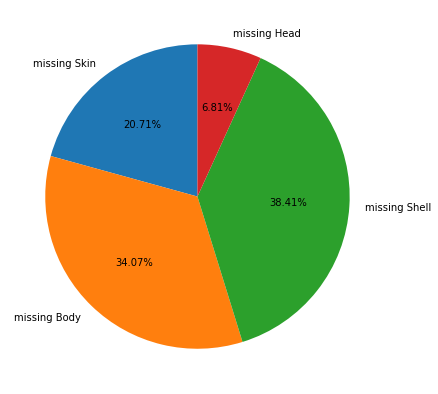

In [71]:
counts  = [basicSkin,
basicBody,
basicShell,
basicHead]
labelsMissed = ['missing Skin', 'missing Body', 'missing Shell', 'missing Head']

plt.figure(figsize=(16, 7))
plt.pie(counts, labels = labelsMissed, autopct='%0.02f%%',  startangle=90)

In our dataset we can see that the most missing attribute is **Shell**. That's mean ~38% of checked NFT's have the same attribute Shell. At the second place is $Body$ - ~34%. 

This comparison helped to make following observations:
 - Attribute Shell and Body are the least varied attributes. In the previous section we were able to see that for these two characteristics we have many choices but as we can see 38% of those NFT's have the same Shell and 34% - the same Body.
 - 

## N-grams

In [72]:
n_Grams_df = attributes.drop(['Token_ID', 'Defined_Rows'], axis=1)
n_Grams_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head
0,Terrapin #04880,mint,geisha,knight sword - brown,naked,snarl - cigar,cyborg - closed eye,spiky - brown
1,Terrapin #09271,mint,lion,base,naked,snarl,tweeker,mohawk - black
2,Terrapin #00735,blue grey,geisha,diamond back,steam punk shirt - red,grin - 5pm shadow,monocle - bored,none
3,Terrapin #08213,lilac,common,base,leather jacket - black and white,dopey,eyepatch - bored,girls - brown
4,Terrapin #03821,mint,lion,base,leather jacket - black and white,grin - 5pm shadow,eyepatch - angry,pylon helmet
...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,charcoal full moon,tiger teddy,shell spikes,naked,terrorpin,steam punk - tweeker,spiky - black
9996,Terrapin #00147,early light,common,base,hawaiian shirt - pineapple,moustache,cyborg - bored,lion hat
9997,Terrapin #00148,midnight blue - big moon,tiger teddy,angel wings,naked,dopey,angry tweeker,lion hat
9998,Terrapin #00149,mint,tiger,base,naked,dopey,eyepatch - bored,lion hat


In [73]:
attrPhrases = []
for attr_i in attributes_temp:
    Background, Skin, Shell, Body, Mouth, Eyes, Head = attr_i
    attributePhrase = '{}; {}; {}; {}; {}; {}; {}'.format(Background, Skin, Shell, Body, Mouth, Eyes, Head)
    attrPhrases.append(attributePhrase)

In [74]:
n_Grams_df['Attribute_Phrase'] = attrPhrases

In [75]:
n_Grams_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Attribute_Phrase
0,Terrapin #04880,mint,geisha,knight sword - brown,naked,snarl - cigar,cyborg - closed eye,spiky - brown,mint; geisha; knight sword - brown; naked; sna...
1,Terrapin #09271,mint,lion,base,naked,snarl,tweeker,mohawk - black,mint; lion; base; naked; snarl; tweeker; mohaw...
2,Terrapin #00735,blue grey,geisha,diamond back,steam punk shirt - red,grin - 5pm shadow,monocle - bored,none,blue grey; geisha; diamond back; steam punk sh...
3,Terrapin #08213,lilac,common,base,leather jacket - black and white,dopey,eyepatch - bored,girls - brown,lilac; common; base; leather jacket - black an...
4,Terrapin #03821,mint,lion,base,leather jacket - black and white,grin - 5pm shadow,eyepatch - angry,pylon helmet,mint; lion; base; leather jacket - black and w...
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,charcoal full moon,tiger teddy,shell spikes,naked,terrorpin,steam punk - tweeker,spiky - black,charcoal full moon; tiger teddy; shell spikes;...
9996,Terrapin #00147,early light,common,base,hawaiian shirt - pineapple,moustache,cyborg - bored,lion hat,early light; common; base; hawaiian shirt - pi...
9997,Terrapin #00148,midnight blue - big moon,tiger teddy,angel wings,naked,dopey,angry tweeker,lion hat,midnight blue - big moon; tiger teddy; angel w...
9998,Terrapin #00149,mint,tiger,base,naked,dopey,eyepatch - bored,lion hat,mint; tiger; base; naked; dopey; eyepatch - bo...


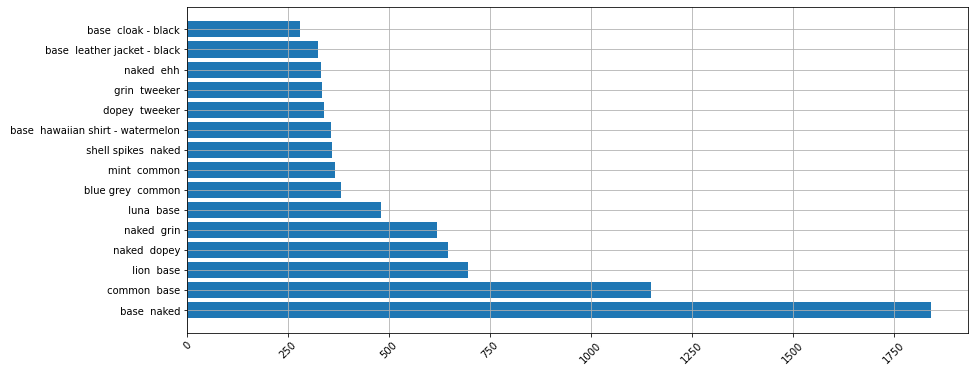

In [76]:
all_sw = list(sklear_stopwords)
re_exp = r"\;" # it is need because in Attribute_Phrase I used ';'.
bigram_vectorizer = CountVectorizer(stop_words = all_sw, 
                                    max_features=15,
                                    ngram_range=(2,2), 
                                    tokenizer=lambda text: re.split(re_exp,text))
fit = bigram_vectorizer.fit_transform(n_Grams_df['Attribute_Phrase'])

bi_counts = pd.DataFrame({'connection':bigram_vectorizer.get_feature_names_out(), 'count':fit.sum(axis=0).tolist()[0]})
bi_counts = bi_counts.sort_values(by=['count'], ascending=False).reset_index(drop=True)

# plt.grid()
plt.figure(figsize=(14,6))
plt.barh(bi_counts['connection'], bi_counts['count'])
plt.xticks(rotation=45)
plt.grid()





In [77]:
bi_counts

,connection,count
0,base naked,1843
1,common base,1149
2,lion base,696
3,naked dopey,646
4,naked grin,618
5,luna base,480
6,blue grey common,381
7,mint common,367
8,shell spikes naked,360
9,base hawaiian shirt - watermelon,356


The plot above shows us the most common connection in our dataset. This plot should be interpreted as follows:
In our collection we received the 1 843 NFTs from 10 000 have the same shell and body - **Base; Naked**. At the second place we can see that there is **Common; Base**. This results are quite unsuprising because we have seen that during analysis of undefined traits *Shell*, *Body* and *Skin* impact the majority of data. 


In the table below we can also see the rarest connections. It shows only first 10 rows and order of connections values is random.

In [78]:
bigram_vectorizer_rarity = CountVectorizer(stop_words = all_sw, 
                                    ngram_range=(2,2), 
                                    tokenizer=lambda text: re.split(re_exp,text))
fit = bigram_vectorizer_rarity.fit_transform(n_Grams_df['Attribute_Phrase'])

bi_counts_rarity = pd.DataFrame({'connection':bigram_vectorizer_rarity.get_feature_names_out(), 'count':fit.sum(axis=0).tolist()[0]})
bi_counts_rarity = bi_counts_rarity.sort_values(by=['count'], ascending=False).reset_index(drop=True)

In [79]:
bi_counts_rarity.tail(10).sort_values(by=['count'], ascending=True)

,connection,count
3552,closed plague mask,1
3553,dragon wings - bones tuxedo,1
3554,steam punk - angry terrorpin,1
3555,tweeker dragon skull,1
3556,closed terrorpin,1
3557,closed top hat - black,1
3558,dragon wings - bones suit and tie,1
3559,steam punk - angry clown afro,1
3560,steam punk - angry clown angel halo,1
3561,licky licky terrorpin,1


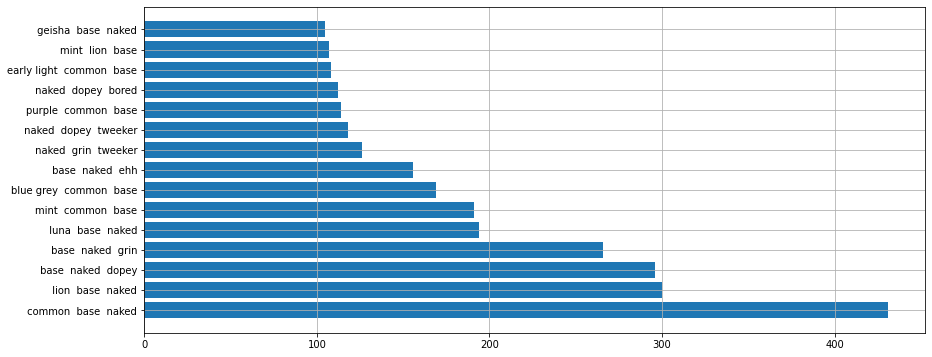

In [80]:
all_sw = list(sklear_stopwords)
trigram_vectorizer = CountVectorizer(stop_words = all_sw, max_features=15, ngram_range=(3,3),
                                    tokenizer=lambda text: re.split(re_exp,text))
fit = trigram_vectorizer.fit_transform(n_Grams_df['Attribute_Phrase'])

tri_counts = pd.DataFrame({'connections':trigram_vectorizer.get_feature_names_out(), 'count':fit.sum(axis=0).tolist()[0]})
tri_counts = tri_counts.sort_values(by=['count'], ascending=False).reset_index(drop=True)

# plt.grid()
plt.figure(figsize=(14,6))
plt.barh(tri_counts['connections'], tri_counts['count'])
plt.grid()


In [81]:
trigram_vectorizer_rarity = CountVectorizer(stop_words = all_sw, ngram_range=(3,3),
                                    tokenizer=lambda text: re.split(re_exp,text))
fit = trigram_vectorizer_rarity.fit_transform(n_Grams_df['Attribute_Phrase'])

tri_counts_rarity = pd.DataFrame({'connections':trigram_vectorizer_rarity.get_feature_names_out(), 'count':fit.sum(axis=0).tolist()[0]})
tri_counts_rarity = tri_counts_rarity.sort_values(by=['count'], ascending=False).reset_index(drop=True)

In [82]:
tri_counts_rarity.tail(10).sort_values(by=['count'], ascending=True)

,connections,count
18333,kimono sad laser,1
18334,kimono sad steam punk - angry,1
18335,kimono scowl bored - shaved brow,1
18336,kimono scowl cyborg - bored,1
18337,kimono scowl sunnies - gun metal,1
18338,kimono scowl tweeker,1
18339,kimono scream goggle steam punk,1
18340,kimono scream laser,1
18341,kimono scream steam punk - angry,1
18342,steel blue zombie shell spikes,1


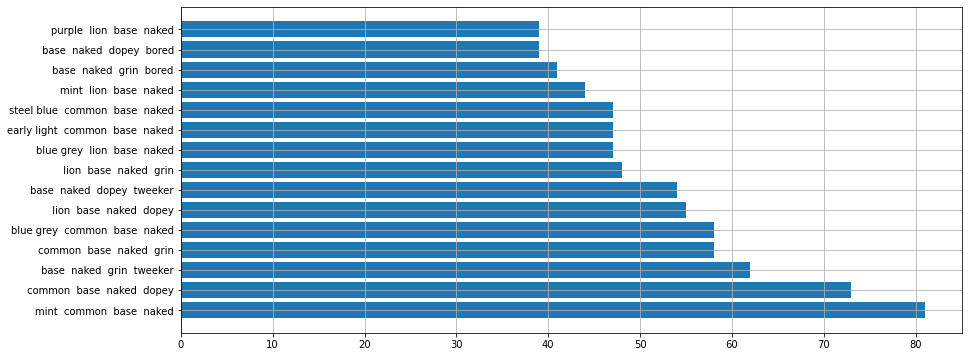

In [83]:
all_sw = list(sklear_stopwords)
fourgram_vectorizer = CountVectorizer(stop_words = all_sw, max_features=15, ngram_range=(4,4),
                                     tokenizer=lambda text: re.split(re_exp,text))
fit = fourgram_vectorizer.fit_transform(n_Grams_df['Attribute_Phrase'])

four_grams = pd.DataFrame({'word':fourgram_vectorizer.get_feature_names_out(), 'count':fit.sum(axis=0).tolist()[0]})
four_grams = four_grams.sort_values(by=['count'], ascending=False).reset_index(drop=True)


plt.figure(figsize=(14,6))
plt.barh(four_grams['word'], four_grams['count'])
plt.grid()

In [84]:
all_sw = list(sklear_stopwords)
fourgram_vectorizer_rarity = CountVectorizer(stop_words = all_sw,  ngram_range=(4,4),
                                     tokenizer=lambda text: re.split(re_exp,text))
fit = fourgram_vectorizer_rarity.fit_transform(n_Grams_df['Attribute_Phrase'])

four_grams_rarity = pd.DataFrame({'connections':fourgram_vectorizer_rarity.get_feature_names_out(), 'count':fit.sum(axis=0).tolist()[0]})
four_grams_rarity = four_grams_rarity.sort_values(by=['count'], ascending=False).reset_index(drop=True)

In [85]:
four_grams_rarity.tail(10).sort_values(by=['count'], ascending=True)

,connections,count
28588,knight sword - brown cloak - black dopey - ...,1
28589,knight sword - brown cloak - black dopey - ...,1
28590,knight sword - brown cloak - black dopey b...,1
28591,knight sword - brown cloak - black bubblegu...,1
28592,knight sword - brown cloak - black beard s...,1
28593,knight sword - brown cloak - black beard b...,1
28594,knight sword - brown assassins cloak - white...,1
28595,knight sword - brown assassins cloak - black...,1
28596,knight sword - brown assassins cloak - black...,1
28597,steel blue zombie shell spikes kimono,1


## Rarity score

In [86]:
allNFTs = len(mintNFT['Name'].unique())
allNFTs

10000

In our research we decide to use simple rarity score definition:

$$ rarity\ score = 1/[Traits\ Rarity]$$
where *Traits Rarity = [number of object with trait]/[Number of all objects]*

In [87]:
attributes = attributes.drop('Defined_Rows', axis=1)

In [88]:
attributes

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID
0,Terrapin #04880,mint,geisha,knight sword - brown,naked,snarl - cigar,cyborg - closed eye,spiky - brown,21115668659623778144848103954867683887
1,Terrapin #09271,mint,lion,base,naked,snarl,tweeker,mohawk - black,339686573371205809325137876315247034028
2,Terrapin #00735,blue grey,geisha,diamond back,steam punk shirt - red,grin - 5pm shadow,monocle - bored,none,26845686848091010612034591826243939022
3,Terrapin #08213,lilac,common,base,leather jacket - black and white,dopey,eyepatch - bored,girls - brown,29725014212231427076011833295205785773
4,Terrapin #03821,mint,lion,base,leather jacket - black and white,grin - 5pm shadow,eyepatch - angry,pylon helmet,208630217786676767860015082049195109707
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,charcoal full moon,tiger teddy,shell spikes,naked,terrorpin,steam punk - tweeker,spiky - black,140850908578020633267983016681440335825
9996,Terrapin #00147,early light,common,base,hawaiian shirt - pineapple,moustache,cyborg - bored,lion hat,198469524447758964403111579286542946696
9997,Terrapin #00148,midnight blue - big moon,tiger teddy,angel wings,naked,dopey,angry tweeker,lion hat,7349082768268168848355752264853030978
9998,Terrapin #00149,mint,tiger,base,naked,dopey,eyepatch - bored,lion hat,207748826621535591411786181607822466045


### Rarity for single score

It is defined in DataFrame *TraitsRarity* (and also with csv file with almost the same name).

In [89]:
attributes

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID
0,Terrapin #04880,mint,geisha,knight sword - brown,naked,snarl - cigar,cyborg - closed eye,spiky - brown,21115668659623778144848103954867683887
1,Terrapin #09271,mint,lion,base,naked,snarl,tweeker,mohawk - black,339686573371205809325137876315247034028
2,Terrapin #00735,blue grey,geisha,diamond back,steam punk shirt - red,grin - 5pm shadow,monocle - bored,none,26845686848091010612034591826243939022
3,Terrapin #08213,lilac,common,base,leather jacket - black and white,dopey,eyepatch - bored,girls - brown,29725014212231427076011833295205785773
4,Terrapin #03821,mint,lion,base,leather jacket - black and white,grin - 5pm shadow,eyepatch - angry,pylon helmet,208630217786676767860015082049195109707
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,charcoal full moon,tiger teddy,shell spikes,naked,terrorpin,steam punk - tweeker,spiky - black,140850908578020633267983016681440335825
9996,Terrapin #00147,early light,common,base,hawaiian shirt - pineapple,moustache,cyborg - bored,lion hat,198469524447758964403111579286542946696
9997,Terrapin #00148,midnight blue - big moon,tiger teddy,angel wings,naked,dopey,angry tweeker,lion hat,7349082768268168848355752264853030978
9998,Terrapin #00149,mint,tiger,base,naked,dopey,eyepatch - bored,lion hat,207748826621535591411786181607822466045


In [90]:
dataframes = [background_df, skin_df, shell_df, Body_df, Mouth_df, Eyes_df, Head_df]
features = ['Background', 'Skin', 'Shell', 'Body', 'Mouth', 'Eyes', 'Head']

In [91]:
simpleRarityScore = []
for i in range(allNFTs):
    attributes_i = list(attributes.iloc[i])[1:-2]
    score = []
    counter = 0
    for attr in attributes_i:
        df = dataframes[counter]
        char = features[counter]
        score.append(float(df['Count [%]'][df[char]==attr]))
        counter+=1
    simpleRarityScore.append(sum(score))

In [92]:
attributes['SimpleRarScore'] = simpleRarityScore

In [93]:
attributes

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID,SimpleRarScore
0,Terrapin #04880,mint,geisha,knight sword - brown,naked,snarl - cigar,cyborg - closed eye,spiky - brown,21115668659623778144848103954867683887,69.55
1,Terrapin #09271,mint,lion,base,naked,snarl,tweeker,mohawk - black,339686573371205809325137876315247034028,141.45
2,Terrapin #00735,blue grey,geisha,diamond back,steam punk shirt - red,grin - 5pm shadow,monocle - bored,none,26845686848091010612034591826243939022,30.16
3,Terrapin #08213,lilac,common,base,leather jacket - black and white,dopey,eyepatch - bored,girls - brown,29725014212231427076011833295205785773,96.96
4,Terrapin #03821,mint,lion,base,leather jacket - black and white,grin - 5pm shadow,eyepatch - angry,pylon helmet,208630217786676767860015082049195109707,84.14
...,...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,charcoal full moon,tiger teddy,shell spikes,naked,terrorpin,steam punk - tweeker,spiky - black,140850908578020633267983016681440335825,65.80
9996,Terrapin #00147,early light,common,base,hawaiian shirt - pineapple,moustache,cyborg - bored,lion hat,198469524447758964403111579286542946696,89.03
9997,Terrapin #00148,midnight blue - big moon,tiger teddy,angel wings,naked,dopey,angry tweeker,lion hat,7349082768268168848355752264853030978,69.67
9998,Terrapin #00149,mint,tiger,base,naked,dopey,eyepatch - bored,lion hat,207748826621535591411786181607822466045,122.22


## Price vs rarity

In [95]:
df = pd.read_pickle(dataset_path +"transactions.pkl")

In [96]:
sells = []
for i in range(0, len(df)-1):
    k=[]
    for j in range(0, len(attributes)-1):
        if df.loc[i, 'token_id'] == attributes.loc[j, 'Token_ID']:
            k.append([df.loc[i, 'amount'], attributes.loc[j, 'SimpleRarScore']])
    if k:
        sells.append(k)

In [97]:
price = []
rar =[]
for i in sells:
    price.append(float(i[0][0]))
    rar.append(float(i[0][1]))
price = np.array(price)/1000000

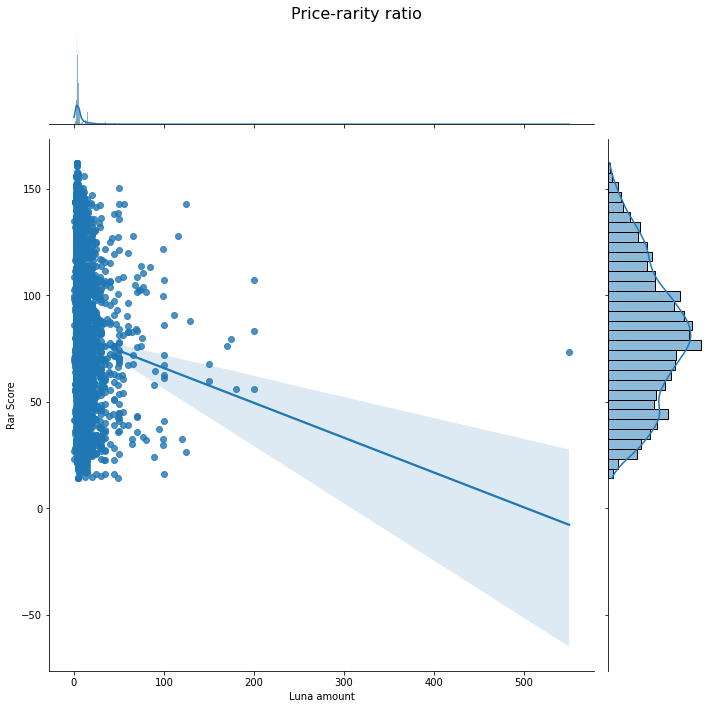

In [98]:
g = sns.jointplot(x=price, y=rar, kind='reg',
                    height=10)
g.set_axis_labels('Luna amount', 'Rar Score', fontsize=10)
g.fig.suptitle("Price-rarity ratio",fontsize=16)
g.fig.tight_layout()

The above analysis is analogous to the one we performed for individual attributes. This time, however, we took into account the price of the token in relation to its rarity score (the resulting rarity of all assets).
We see that one value differs significantly from the others, so we decided to get rid of it (we will deal with it later), this value was also excluded in previous analyzes.

In [99]:
price = list(price)
ind = price.index(max(price))
price.remove(max(price))
rar.remove(rar[ind])

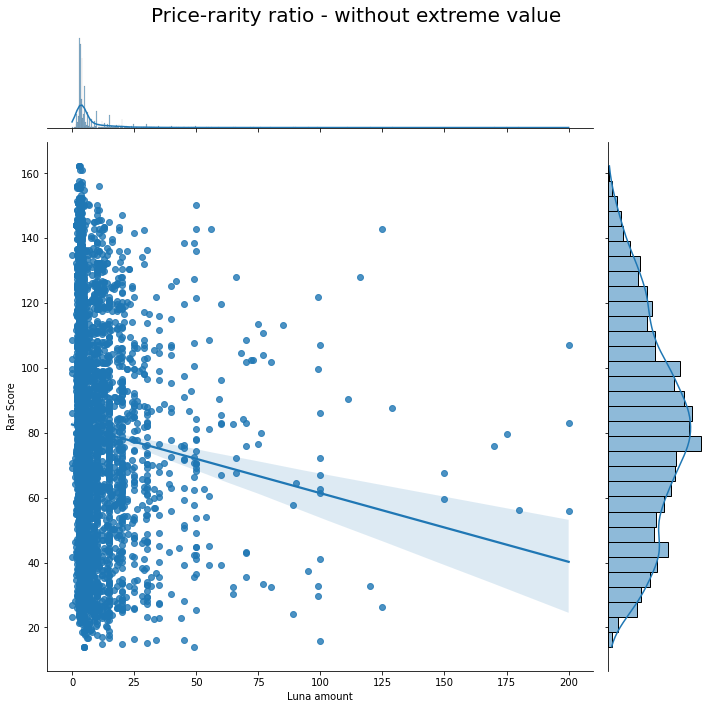

In [100]:
g = sns.jointplot(x=price, y=rar,kind='reg', height=10)
g.set_axis_labels('Luna amount', 'Rar Score', fontsize=10)
g.fig.suptitle("Price-rarity ratio - without extreme value",fontsize=20)
g.fig.tight_layout()

After getting rid of the outlier value, we can conclude that the general rarity of attribute combinations for a token significantly affects its price

## The most expensive token - was it worth it

In [110]:
index = df[df['amount'] == '550000000'].index.values[0]
index_max = attributes[attributes['Token_ID'] == df.loc[index,'token_id']].index.values[0]
atr = attributes.loc[index_max].values[1:-2]

In [111]:
price = []
rar =[]
for i in sells:
    price.append(float(i[0][0]))
    rar.append(float(i[0][1]))

In [112]:
back = background_df.loc[background_df[background_df['Background'] == atr[0]].index.values[0], 'Count [%]']/100
skin = skin_df.loc[skin_df[skin_df['Skin'] == atr[1]].index.values[0], 'Count [%]']/100
shell = shell_df.loc[shell_df[shell_df['Shell'] == atr[2]].index.values[0], 'Count [%]']/100
body = Body_df.loc[Body_df[Body_df['Body'] == atr[3]].index.values[0], 'Count [%]']/100
mouth = Mouth_df.loc[Mouth_df[Mouth_df['Mouth'] == atr[4]].index.values[0], 'Count [%]']/100
eyes = Eyes_df.loc[Eyes_df[Eyes_df['Eyes'] == atr[5]].index.values[0], 'Count [%]']/100
head = Head_df.loc[Head_df[Head_df['Head'] == atr[6]].index.values[0], 'Count [%]']/100

In [113]:
most = {'Attributes': atr, 'Rarity': [back, skin, shell, body, mouth, eyes, head]}  
#most_df = pd.DataFrame(most)
most_df = pd.DataFrame(most, index =['Background', 'Skin', 'Shell', 'Body', 'Mouth', 'Eyes', 'Head'])  

In [114]:
most_df

,Attributes,Rarity
Background,blue grey,0.1511
Skin,leopard unicorn,0.0464
Shell,base,0.4547
Body,luna shirt,0.0185
Mouth,licky licky,0.0207
Eyes,steam punk - angry,0.0421
Head,mohawk - purple,0.0217


The most expensive token sold in the analyzed dataset (550 luna) is the one presented in the table above. We can see that the token contains a very popular shell, which significantly lowered its rarity score, but other attributes are from much rarer collections. It is difficult to clearly state whether the buyer consciously allocated such amount of currency due to the general rarity of attributes or whether he was more interested in the visual aspect

# Summary

An important aspect in our analyzes was to compare the rarity of nft token combinations to their price. We were able to draw some interesting conclusions about the preferences of buyers in terms of individual attributes as well as the general statement (rarity score). You can see that over time, the analysis of this market may become much clearer due to the possible increase in the number of transactions. In our opinion, the very nature of the tokens is an issue that hinders the analysis. It is hard to judge whether buyers are guided by the calculation (they pay attention to the rarity of the acquired nft) or whether they take into account purely aesthetic issues.